In [6]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [8]:
df=pd.read_csv(r"C:\Users\PRASAD\Desktop\Untitled Folder 1\archive (5)\Churn_Modelling.csv")

# DATA

In [90]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


No null values in any columns but there may be a possibility of empty strings so lets check that

In [92]:
df.isna().all()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [93]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So Let us check for empty string, and as you can see below there is no empty values 

In [21]:
df[df.Surname == ""]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [22]:
df[df.Geography == ""]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [23]:
df[df.Gender == ""]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [30]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Removing Surname,Customer ID, Rownumber as they practically dont make any sense

In [37]:
df1= df.drop(["RowNumber","CustomerId","Surname"],axis = 1)

In [50]:
for col in df1:
    print(f"{col}:{df1[col].unique()}")

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [38]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Age to Number of exited and not exited

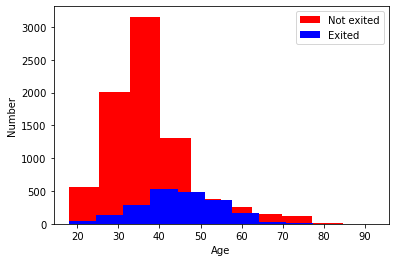

In [94]:
plt.hist(df1[df1.Exited==0].Age,color = "red",label = "Not exited")
plt.hist(df1[df1.Exited==1].Age,color = "blue",label = "Exited")
plt.xlabel("Age")
plt.ylabel("Number")
plt.legend()

<AxesSubplot:xlabel='Gender', ylabel='count'>

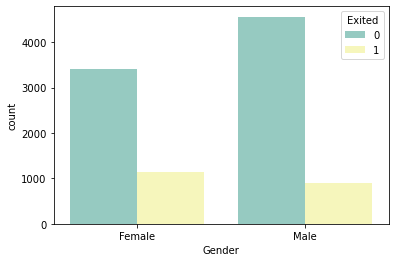

In [95]:
import seaborn as sns 
grouped = df.groupby(['Gender', 'Exited']).size().reset_index(name='count')
sns.barplot(x="Gender", y="count", hue="Exited", data=grouped,palette="Set3")

<AxesSubplot:xlabel='Geography', ylabel='count'>

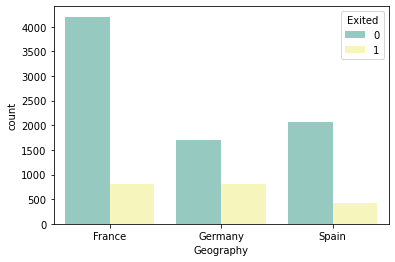

In [96]:
grouped = df.groupby(['Geography', 'Exited']).size().reset_index(name='count')
sns.barplot(x="Geography", y="count", hue="Exited", data=grouped,palette="Set3")

As there are not a lot of columns which are categorical data, we do a One-Hot encoding, hence you can clearly see the increase in columns

In [97]:
df2 = pd.get_dummies(data = df1, columns = ["Gender","Geography"])

In [98]:
df2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


There are no values with a lot of correlation to remove, hence we do not remove any more columns

In [99]:
df2.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.002857,-0.002857,-0.008928,0.005538,0.004780
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.027544,-0.027544,-0.039208,0.046897,-0.001685
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.014733,0.014733,-0.002848,-0.000567,0.003868
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.012087,0.012087,-0.231329,0.401110,-0.134892
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.021859,-0.021859,0.001230,-0.010419,0.009039
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005766,0.005766,0.002467,0.010577,-0.013480
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.022544,0.022544,0.003317,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.008112,-0.008112,-0.003332,0.010297,-0.006482
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.106512,-0.106512,-0.104955,0.173488,-0.052667
Gender_Female,0.002857,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512,1.000000,-1.000000,-0.006772,0.024628,-0.016889


<AxesSubplot:>

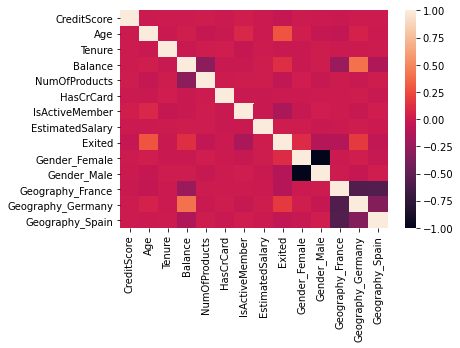

In [100]:
corr = df2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [101]:
df2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [102]:
for i in df2.columns:
    print(f"{i}: {df2[i].unique()}")

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

Doing a MinMaxScaling for the non categorical data 

In [103]:
cols_to_scale = ['EstimatedSalary','CreditScore','Tenure',"Age","NumOfProducts","Balance"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [104]:
for i in df2.columns:
    print(f"{i}: {df2[i].unique()}")

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

# MODEL

In [105]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

# ADAM

In [77]:
# Adam
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.6767 - accuracy: 0.7193
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6102 - accuracy: 0.7981
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5688 - accuracy: 0.8023
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5354 - accuracy: 0.8110
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5059 - accuracy: 0.8211
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.8278
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.8324
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4539 - accuracy: 0.8349
Epoch 9/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4453 - accuracy: 0.8338
Epoch 10/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4387 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8497
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8501
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8504
Epoch 84/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3994 - accuracy: 0.8491
Epoch 85/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3996 - accuracy: 0.8497
Epoch 86/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3987 - accuracy: 0.8484
Epoch 87/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3994 - accuracy: 0.8497
Epoch 88/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3982 - accuracy: 0.8512
Epoch 89/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3994 - accuracy: 0.8501
Epoch 90/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3972 - accuracy: 

In [78]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 6ms/step - loss: 0.3977 - accuracy: 0.8505


[0.3976829946041107, 0.8504999876022339]

# ADAGRAD

In [79]:
# Adagrad
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.7012 - accuracy: 0.2869
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.6922 - accuracy: 0.5605
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6866 - accuracy: 0.7405
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6825 - accuracy: 0.7896
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6792 - accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6765 - accuracy: 0.7968
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6742 - accuracy: 0.7966
Epoch 8/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6722 - accuracy: 0.7964
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6704 - accuracy: 0.7965
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6688 - accura

250/250 [==============================] - 1s 4ms/step - loss: 0.6247 - accuracy: 0.7960
Epoch 82/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6243 - accuracy: 0.7960
Epoch 83/100
250/250 [==============================] - 2s 6ms/step - loss: 0.6240 - accuracy: 0.7960
Epoch 84/100
250/250 [==============================] - 2s 6ms/step - loss: 0.6236 - accuracy: 0.7960
Epoch 85/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6233 - accuracy: 0.7960
Epoch 86/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6229 - accuracy: 0.7960
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6226 - accuracy: 0.7960
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6222 - accuracy: 0.7960
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6219 - accuracy: 0.7960
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6215 - accuracy: 

In [80]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.7975


[0.6177534461021423, 0.7975000143051147]

# SGD

In [81]:
#SGD
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.6125 - accuracy: 0.7885
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5350 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5131 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5074 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5058 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5050 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5038 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5032 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 1s 5ms/step - loss: 0.5025 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.4243 - accuracy: 0.8089
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.8121
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4235 - accuracy: 0.8106
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.8091
Epoch 85/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4237 - accuracy: 0.8105
Epoch 86/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4236 - accuracy: 0.8119
Epoch 87/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4232 - accuracy: 0.8112
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.8114
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8104
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 

In [84]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8070


[0.42189309000968933, 0.8069999814033508]

# XGBOOST works Best

In [106]:
from xgboost import XGBClassifier
model = XGBClassifier(tree_method = "gpu_hist",enable_categorical = True)
model.fit(X_train, y_train)

C:\Users\PRASAD\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=True,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [107]:
y_pred = model.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.853


In [89]:
#XGBoost gives best output

In [110]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
7054,0.838,0.270270,0.6,0.000000,0.333333,0,0,0.521961,0,1,0,0,1
442,0.368,0.216216,0.7,0.484466,0.333333,1,1,0.350871,1,0,1,0,0
3954,0.758,0.216216,0.9,0.526595,0.000000,0,1,0.527039,1,0,1,0,0
2288,0.538,0.162162,0.7,0.281904,0.000000,1,1,0.804763,1,0,1,0,0
3196,0.520,0.243243,0.4,0.515908,0.333333,1,0,0.513183,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,0.634,0.202703,0.4,0.506487,0.333333,1,0,0.345033,1,0,0,1,0
532,0.758,0.189189,0.6,0.373436,0.000000,1,1,0.399576,0,1,1,0,0
1370,0.838,0.108108,0.7,0.000000,0.333333,1,0,0.884244,1,0,1,0,0
6514,0.426,0.108108,0.7,0.000000,0.333333,0,0,0.030644,0,1,0,0,1
